In [1]:
import pandas as pd
data = pd.read_csv("../scripts/data-preprocessed.csv")

# Permitir apenas dados que tenham postal code

In [2]:
len(data)

974

In [10]:
data_filtered = data[data["PESSOA_PIPEDRIVE_postal_code"].isna() == False] 

In [11]:
len(data_filtered)

952

In [12]:
data_filtered["PESSOA_PIPEDRIVE_postal_code"]

0      36021-600
1      20710-060
2      86020-410
3      88080-080
4      38400-438
         ...    
969    58052-310
970    41830-120
971    05014-001
972    04513-100
973    22280-010
Name: PESSOA_PIPEDRIVE_postal_code, Length: 952, dtype: object

In [33]:
import requests

def get_coordinates(cep):
    url = f"https://nominatim.openstreetmap.org/search?postalcode={cep}&country=Brazil&format=json"
    response = requests.get(url)
    
    if response.status_code == 200:
        results = response.json()
        
        if results:
            # Se a lista não estiver vazia, obtenha as coordenadas
            result = results[0]
            return (float(result["lat"]), float(result["lon"]))
        else:
            # Se a lista estiver vazia, retorne None, None
            return None, None
    else:
        # Se a resposta não for bem-sucedida, retorne None, None
        return None, None


In [15]:
data_filtered.head()

,PESSOA_PIPEDRIVE_id_person,PESSOA_PIPEDRIVE_id_gender,PESSOA_PIPEDRIVE_id_marrital_status,PESSOA_PIPEDRIVE_state,PESSOA_PIPEDRIVE_city,PESSOA_PIPEDRIVE_postal_code,PESSOA_PIPEDRIVE_contract_start_date,PESSOA_PIPEDRIVE_contract_end_date,PESSOA_PIPEDRIVE_Canal de Preferência,PESSOA_PIPEDRIVE_notes_count,...,PESSOA_PIPEDRIVE_has_notes,ATENDIMENTOS_AGENDA_Datas Psicoterapia Recente,WHOQOL_Físico_New,WHOQOL_Psicológico_New,WHOQOL_Social_New,WHOQOL_Ambiental_New,COMUNICARE_Problemas Abertos Bool,TWILIO_Data Última Mensagens Inbound Recente,TWILIO_Data Última Mensagens Outbound Recente,TWILIO_Data Última Ligações Outbound Recente
0,483,64,80,Minas Gerais,Juiz de Fora,36021-600,2021-01-27,2023-08-26,0,3,...,1,False,4.0,4.0,4.0,4.5,0,False,True,True
1,654,64,82,Rio de Janeiro,Rio de Janeiro,20710-060,2021-04-25,2023-08-02,0,5,...,1,False,3.7,3.2,2.7,3.1,1,True,False,False
2,860,63,80,Paraná,Londrina,86020-410,2022-06-21,2023-09-20,239,3,...,1,False,3.0,3.0,4.0,4.0,1,True,True,False
3,961,63,80,Santa Catarina,Florianópolis,88080-080,2021-07-05,2021-10-01,0,1,...,1,False,2.0,3.0,3.0,3.0,0,False,False,False
4,972,63,82,Minas Gerais,Uberlândia,38400-438,2021-06-28,2023-09-16,0,2,...,1,False,3.9,3.8,4.3,4.1,1,True,True,False


In [17]:
data_filtered["PESSOA_PIPEDRIVE_id_gender"]

0      64
1      64
2      63
3      63
4      63
       ..
969    64
970    64
971    64
972    63
973    63
Name: PESSOA_PIPEDRIVE_id_gender, Length: 952, dtype: int64

In [19]:
data_filtered[(data_filtered["PESSOA_PIPEDRIVE_id_gender"] == 63) & (data_filtered["FUNIL_ASSINATURA_PIPEDRIVE_status"] == "won") & (data_filtered["PESSOA_PIPEDRIVE_postal_code"].str.contains("-"))]["PESSOA_PIPEDRIVE_postal_code"]

35     13426-064
108    13560-161
118    02989-000
127    12322-320
128    05868-790
         ...    
962    06754-060
966    09942-030
968    20771-035
972    04513-100
973    22280-010
Name: PESSOA_PIPEDRIVE_postal_code, Length: 260, dtype: object

In [34]:
homem_won = data_filtered[(data_filtered["PESSOA_PIPEDRIVE_id_gender"] == 63) & (data_filtered["FUNIL_ASSINATURA_PIPEDRIVE_status"] == "won") & (data_filtered["PESSOA_PIPEDRIVE_postal_code"].str.contains("-"))]["PESSOA_PIPEDRIVE_postal_code"].values.tolist()

In [35]:
homem_won

['13426-064',
 '13560-161',
 '02989-000',
 '12322-320',
 '05868-790',
 '13715-000',
 '02218-000',
 '13564-530',
 '30421-318',
 '13208-703',
 '06351-040',
 '09030-540',
 '60353-140',
 '59151-250',
 '05508-030',
 '88708-270',
 '88025-260',
 '83508-200',
 '81110-010',
 '88780-000',
 '95150-000',
 '80050-160',
 '62755-000',
 '82010-610',
 '45028-686',
 '60866-740',
 '40231-230',
 '04103-001',
 '79022-330',
 '49160-000',
 '13566-550',
 '01520-000',
 '02133-000',
 '82530-150',
 '83010-070',
 '83025-320',
 '13562-410',
 '07084-330',
 '07084-310',
 '30421-305',
 '14030-313',
 '03564-050',
 '02807-000',
 '07077-065',
 '13416-050',
 '11410-420',
 '05590-120',
 '05756-250',
 '05756-280',
 '03177-010',
 '13323-210',
 '23057-017',
 '21230-362',
 '50610-100',
 '04049-060',
 '03569-000',
 '04545-000',
 '04533-010',
 '05414-020',
 '05415-020',
 '02675-031',
 '42700-000',
 '04550-003',
 '17519-680',
 '05756-280',
 '13564-331',
 '03582-110',
 '13083-010',
 '22250-020',
 '86802-280',
 '16700-000',
 '1356

In [26]:
len(homem_won)

260

In [21]:
homem_lost = data_filtered[(data_filtered["PESSOA_PIPEDRIVE_id_gender"] == 63) & (data_filtered["FUNIL_ASSINATURA_PIPEDRIVE_status"] == "lost") & (data_filtered["PESSOA_PIPEDRIVE_postal_code"].str.contains("-"))]["PESSOA_PIPEDRIVE_postal_code"].values.tolist()

In [27]:
len(homem_lost)

202

In [22]:
mulher_won = data_filtered[(data_filtered["PESSOA_PIPEDRIVE_id_gender"] == 64) & (data_filtered["FUNIL_ASSINATURA_PIPEDRIVE_status"] == "won") & (data_filtered["PESSOA_PIPEDRIVE_postal_code"].str.contains("-"))]["PESSOA_PIPEDRIVE_postal_code"].values.tolist()

In [28]:
len(mulher_won)

257

In [23]:
mulher_lost = data_filtered[(data_filtered["PESSOA_PIPEDRIVE_id_gender"] == 64) & (data_filtered["FUNIL_ASSINATURA_PIPEDRIVE_status"] == "lost") & (data_filtered["PESSOA_PIPEDRIVE_postal_code"].str.contains("-"))]["PESSOA_PIPEDRIVE_postal_code"].values.tolist()

In [29]:
len(mulher_lost)

210

In [36]:
homem_won_coords = []

for cep in homem_won:
    homem_won_coords.append(get_coordinates(cep))


In [43]:
homem_won_coords

[(None, None),
 (-22.0166858, -47.8865628),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (-23.488914877669902, -46.587064621359225),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (-5.88150505, -35.20566675),
 (-23.557214558823528, -46.72351806176471),
 (None, None),
 (None, None),
 (None, None),
 (-25.4966368, -49.2943251),
 (-28.196371426785714, -48.68600449107143),
 (-29.373315281818183, -51.10882250227272),
 (None, None),
 (-4.490802, -38.5975627),
 (None, None),
 (None, None),
 (-3.8368576114285715, -38.52645145142858),
 (None, None),
 (-23.5752535, -46.6356998),
 (None, None),
 (-10.861734508653846, -37.09943773846154),
 (-22.0006326125, -47.895915775),
 (-23.558580558333336, -46.62044281666667),
 (-23.49572715490196, -46.583111154901964),
 (None, None),
 (None, None),
 (-25.5603111, -49.2095512),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (Non

In [44]:
homem_won_coords_certo = []

for cep in homem_won_coords:
    if cep != (None, None):
        homem_won_coords_certo.append(cep)

In [37]:
homem_lost_coords = []

for cep in homem_lost:
    homem_lost_coords.append(get_coordinates(cep))


In [45]:
homem_lost_coords_certo = []

for cep in homem_lost_coords:
    if cep != (None, None):
        homem_lost_coords_certo.append(cep)

In [49]:
len(homem_lost_coords_certo)

76

(-48.5750066, -27.6063924)


In [38]:
mulher_won_coords = []

for cep in mulher_won:
    mulher_won_coords.append(get_coordinates(cep))



In [46]:
mulher_won_coords_certo = []

for cep in mulher_won_coords:
    if cep != (None, None):
        mulher_won_coords_certo.append(cep)

In [41]:
mulher_lost_coords = []

for cep in mulher_lost:
    mulher_lost_coords.append(get_coordinates(cep))

In [47]:
mulher_lost_coords_certo = []

for cep in mulher_lost_coords:
    if cep != (None, None):
        mulher_lost_coords_certo.append(cep)

/var/folders/5b/y5xgth0n79lbt3pkmgmjphzh0000gn/T/ipykernel_63485/314958367.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


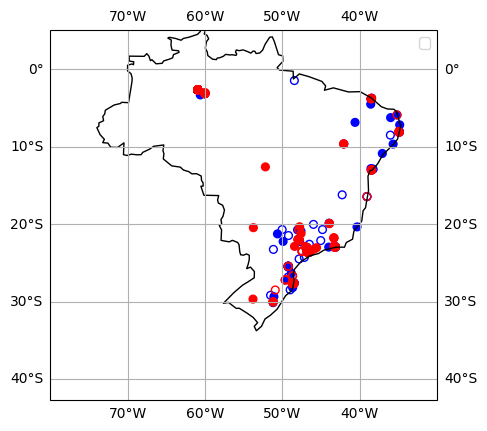

In [76]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.patches import Polygon, Circle
import geopandas as gpd

# Carregue os dados do contorno do Brasil usando GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
brazil = world[world['name'] == 'Brazil']

# Crie uma figura e eixos
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Adicione o contorno do Brasil como um fundo
ax.add_geometries(brazil['geometry'], crs=ccrs.PlateCarree(), edgecolor='black', facecolor='none')

# Adicione limites de latitude e longitude
ax.set_extent([-80, -30, -40, 5])  # Defina os limites para incluir apenas o Brasil



# Adicione um triângulo
triangle_coords = [(5, -5), (10, -5), (7.5, -2.5)]

for coords in homem_won_coords_certo:
    # Adicione um círculo
    circle = Circle(tuple(reversed(coords)), 0.5, edgecolor='blue', facecolor='blue', transform=ccrs.PlateCarree())
    ax.add_patch(circle)

for coords in homem_lost_coords_certo:
    # Adicione um círculo
    circle = Circle(tuple(reversed(coords)), 0.5, edgecolor='blue', facecolor='none', transform=ccrs.PlateCarree())
    ax.add_patch(circle)

for coords in mulher_won_coords_certo:
    # Adicione um círculo
    circle = Circle(tuple(reversed(coords)), 0.5, edgecolor='red', facecolor='red', transform=ccrs.PlateCarree())
    ax.add_patch(circle)

for coords in mulher_lost_coords_certo:
    circle = Circle(tuple(reversed(coords)), 0.5, edgecolor='red', facecolor='none', transform=ccrs.PlateCarree())
    ax.add_patch(circle)

# Adicione grade de coordenadas
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Adicione uma legenda
ax.legend()

# Mostre o gráfico
plt.show()
